In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Visualize plots in this Notebook
%matplotlib inline

In [3]:
# style lists
# 아래 스타일 중에서 본인 스타일대로 선택하여 시각화하면 됩니다
plt.style.use('ggplot') # plt 스타일 지정
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


# Exploratory Data Analysis

## Load Data

In [5]:
data_directory = r'/content/drive/MyDrive/Data'
df = pd.read_csv(data_directory+'/Auto_adjust.csv')
# pd.read_excel()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8.0,NaN,165,3693.0,11.5,70,1,buick skylark 320
2,18.0,NaN,318.0,150,3436.0,11.0,70,1,plymouth satellite
3,16.0,8.0,304.0,NaN,3433.0,12.0,70,1,amc rebel sst
4,17.0,8.0,302.0,140,3449.0,10.5,70,1,ford torino


In [6]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     393 non-null    float64
 2   displacement  393 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        391 non-null    float64
 5   acceleration  392 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 28.0+ KB


In [8]:
df['horsepower'].unique()

array(['130', '165', '150', nan, '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '200',
       '210', '193', '100', '105', '175', '153', '180', '110', '72', '86',
       '70', '76', '65', '69', '60', '80', '54', '208', '155', '112',
       '92', '145', '137', '158', '167', '94', '107', '230', '49', '75',
       '91', '122', '67', '83', '78', '52', '61', '93', '148', '129',
       '96', '71', '98', '115', '53', '81', '79', '120', '152', '102',
       '108', '68', '58', '149', '89', '63', '48', '66', '139', '103',
       '125', '133', '138', '135', '142', '77', '?', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [10]:
df['horsepower']=df['horsepower'].replace('?',np.nan)
df['horsepower']=df['horsepower'].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     393 non-null    float64
 2   displacement  393 non-null    float64
 3   horsepower    389 non-null    float64
 4   weight        391 non-null    float64
 5   acceleration  392 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 28.0+ KB


In [12]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,393.000000,393.000000,389.000000,391.000000,392.000000,397.000000,397.000000
mean,23.515869,5.442748,193.034351,104.349614,2966.079284,15.544898,75.994962,1.574307
std,7.825804,1.694049,104.023604,38.565998,847.405652,2.761393,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2221.500000,13.775000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,92.000000,2795.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3607.000000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Missing value

In [13]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8.0,NaN,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,NaN,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8.0,304.0,NaN,3433.0,12.0,70,1,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70,1,ford torino


In [16]:
len(df)

397

In [17]:
len(df.dropna())

371

In [20]:
df = df.dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
4,17.0,8.0,302.0,140.0,3449.0,10.5,70,1,ford torino
6,14.0,8.0,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8.0,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8.0,455.0,225.0,4425.0,10.0,70,1,pontiac catalina


In [21]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
4,17.0,8.0,302.0,140.0,3449.0,10.5,70,1,ford torino
6,14.0,8.0,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8.0,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8.0,455.0,225.0,4425.0,10.0,70,1,pontiac catalina


In [22]:
df.reset_index(inplace=True,drop=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,17.0,8.0,302.0,140.0,3449.0,10.5,70,1,ford torino
2,14.0,8.0,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
3,14.0,8.0,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
4,14.0,8.0,455.0,225.0,4425.0,10.0,70,1,pontiac catalina


## Data preprocessing

In [24]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,17.0,8.0,302.0,140.0,3449.0,10.5,70,1,ford torino
2,14.0,8.0,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
3,14.0,8.0,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
4,14.0,8.0,455.0,225.0,4425.0,10.0,70,1,pontiac catalina


In [26]:
df.index = df['name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
ford torino,17.0,8.0,302.0,140.0,3449.0,10.5,70,1,ford torino
chevrolet impala,14.0,8.0,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
plymouth fury iii,14.0,8.0,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
pontiac catalina,14.0,8.0,455.0,225.0,4425.0,10.0,70,1,pontiac catalina


In [29]:
df[['mpg','displacement']]

,mpg,displacement
name,,
chevrolet chevelle malibu,18.0,307.0
ford torino,17.0,302.0
chevrolet impala,14.0,454.0
plymouth fury iii,14.0,440.0
pontiac catalina,14.0,455.0
...,...,...
chevrolet camaro,27.0,151.0
vw pickup,44.0,97.0
dodge rampage,32.0,135.0


In [32]:
df=df[list(df.columns)[:-1]]
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70,1
ford torino,17.0,8.0,302.0,140.0,3449.0,10.5,70,1
chevrolet impala,14.0,8.0,454.0,220.0,4354.0,9.0,70,1
plymouth fury iii,14.0,8.0,440.0,215.0,4312.0,8.5,70,1
pontiac catalina,14.0,8.0,455.0,225.0,4425.0,10.0,70,1


In [34]:
np.corrcoef(df['mpg'],df['weight']) # mpg increase --> weight decrease

array([[ 1.        , -0.83007742],
       [-0.83007742,  1.        ]])

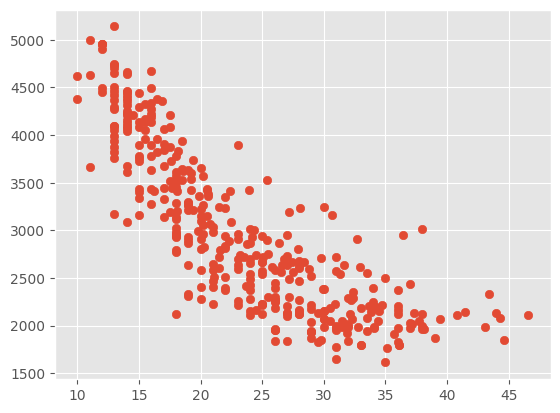

In [35]:
plt.scatter(df['mpg'],df['weight']) #

In [36]:
np.corrcoef(df['mpg'],df['acceleration'])

array([[1.        , 0.42459305],
       [0.42459305, 1.        ]])

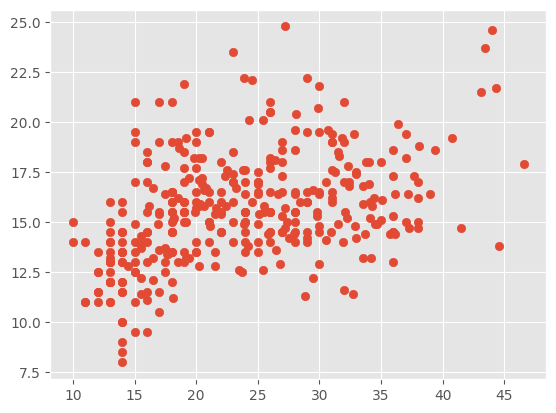

In [37]:
plt.scatter(df['mpg'],df['acceleration'])

In [39]:
def scatter_figure(x1,x2):
  fig = plt.figure(figsize=(10,10))
  ax = plt.subplot(111)
  ax.scatter(x1,x2)

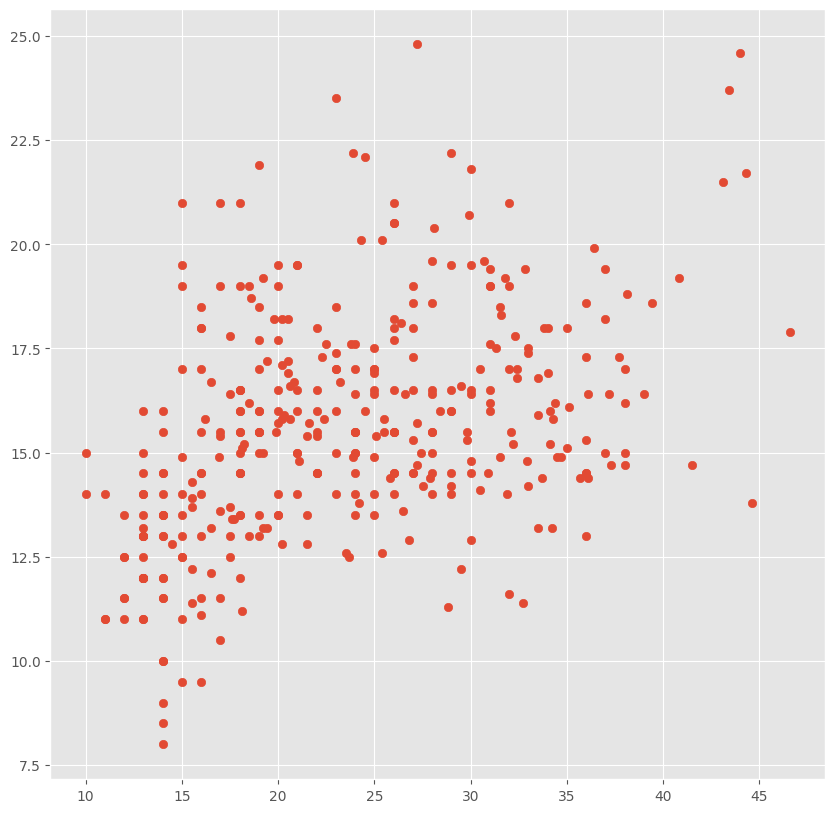

In [41]:
scatter_figure(df['mpg'],df['acceleration'])

In [42]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70,1
ford torino,17.0,8.0,302.0,140.0,3449.0,10.5,70,1
chevrolet impala,14.0,8.0,454.0,220.0,4354.0,9.0,70,1
plymouth fury iii,14.0,8.0,440.0,215.0,4312.0,8.5,70,1
pontiac catalina,14.0,8.0,455.0,225.0,4425.0,10.0,70,1


In [46]:
df[['year','cylinders','mpg']].groupby('year').sum()

,cylinders,mpg
year,,
70,124.0,348.0
71,148.0,548.0
72,155.0,473.0
73,255.0,684.0
74,136.0,592.0
75,168.0,608.0
76,192.0,733.5
77,153.0,654.5
78,193.0,866.2


In [43]:
df.groupby('year').sum()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
year,,,,,,,
70,348.0,124.0,5140.0,2653.0,61772.0,250.5,26
71,548.0,148.0,5635.0,2818.0,79418.0,386.0,38
72,473.0,155.0,5897.5,3176.0,85862.0,392.0,37
73,684.0,255.0,10275.0,5219.0,136761.0,572.5,55
74,592.0,136.0,4437.0,2450.0,74829.0,420.5,44
75,608.0,168.0,6166.0,3032.0,95304.0,481.5,44
76,733.5,192.0,6725.0,3438.0,104677.0,542.0,50
77,654.5,153.0,5359.0,2942.0,83926.0,432.2,44
78,866.2,193.0,6401.0,3589.0,103025.0,569.0,58


In [52]:
df.groupby('year').mean()['weight']

year
70    3251.157895
71    3054.538462
72    3302.384615
73    3419.025000
74    2878.038462
75    3176.800000
76    3078.735294
77    2997.357143
78    2861.805556
79    3055.344828
80    2405.461538
81    2476.000000
82    2414.230769
Name: weight, dtype: float64

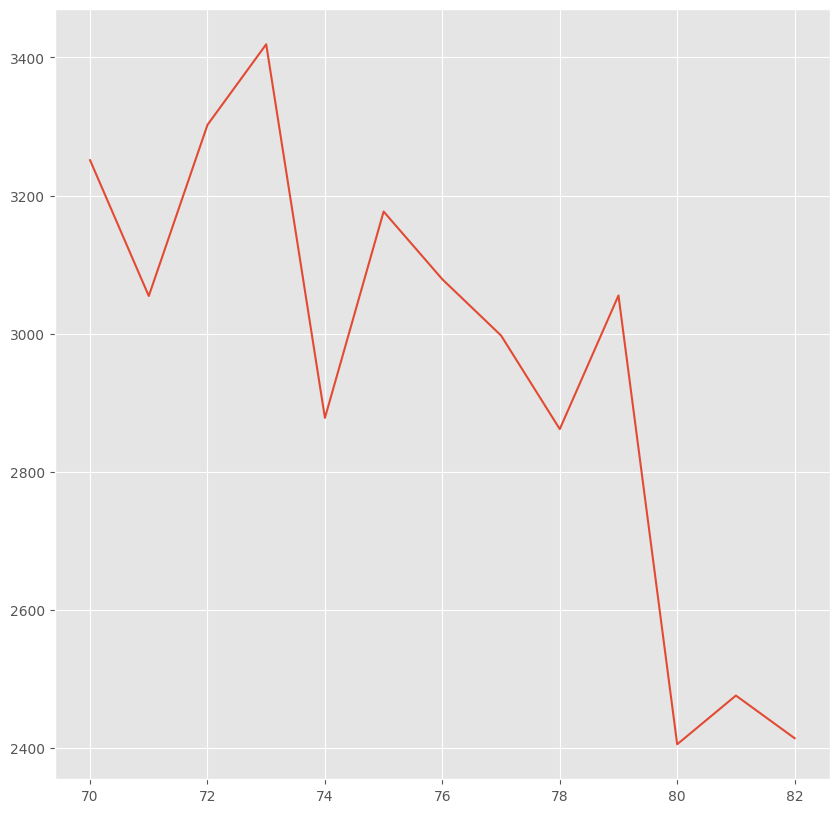

In [51]:
def line_figure(x1,x2):
  fig = plt.figure(figsize=(10,10))
  ax = plt.subplot(111)
  ax.plot(x1,x2)

line_figure(df.groupby('year').mean().index,df.groupby('year').mean()['weight'])

# smoothing

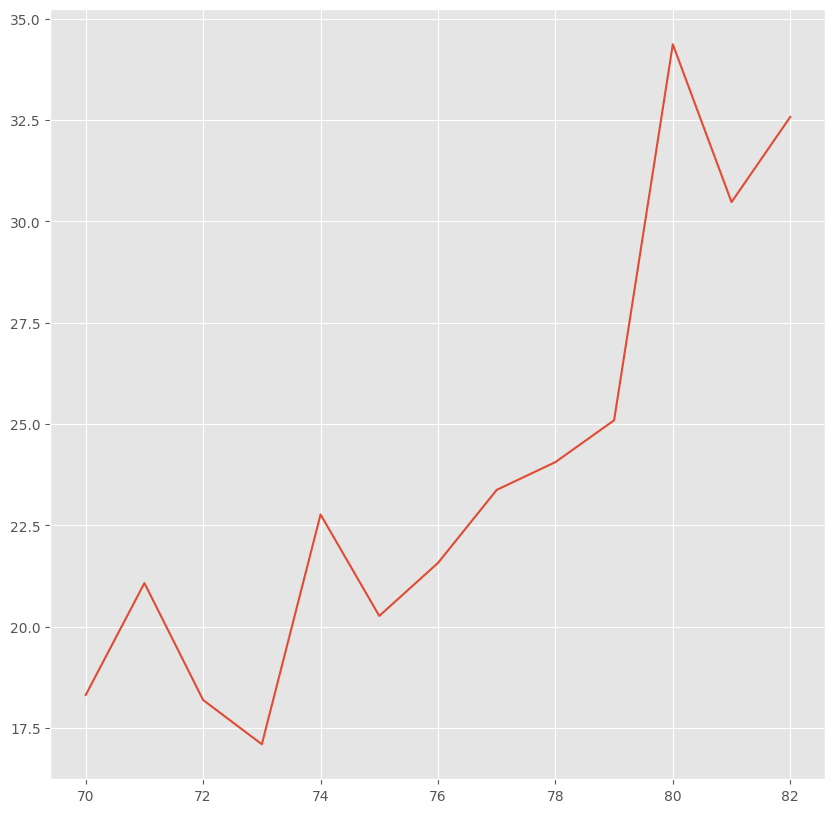

In [53]:
line_figure(df.groupby('year').mean().index,df.groupby('year').mean()['mpg'])

In [54]:
from collections import Counter

In [58]:
Counter([1,1,1,1,2])[1]

4

In [61]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70,1
ford torino,17.0,8.0,302.0,140.0,3449.0,10.5,70,1
chevrolet impala,14.0,8.0,454.0,220.0,4354.0,9.0,70,1
plymouth fury iii,14.0,8.0,440.0,215.0,4312.0,8.5,70,1
pontiac catalina,14.0,8.0,455.0,225.0,4425.0,10.0,70,1


In [ ]:
firm_names = [item[0] for item in df.index.str.split(' ')]
firm_names

In [72]:
Counter(firm_names).most_common(20)

[('ford', 45),
 ('chevrolet', 42),
 ('plymouth', 30),
 ('amc', 25),
 ('dodge', 25),
 ('toyota', 23),
 ('datsun', 22),
 ('pontiac', 16),
 ('buick', 16),
 ('volkswagen', 15),
 ('honda', 12),
 ('mercury', 11),
 ('mazda', 10),
 ('oldsmobile', 9),
 ('peugeot', 8),
 ('fiat', 8),
 ('audi', 7),
 ('volvo', 6),
 ('vw', 6),
 ('chrysler', 5)]

In [74]:
temp_list = Counter(firm_names).most_common(10)
temp_list

[('ford', 45),
 ('chevrolet', 42),
 ('plymouth', 30),
 ('amc', 25),
 ('dodge', 25),
 ('toyota', 23),
 ('datsun', 22),
 ('pontiac', 16),
 ('buick', 16),
 ('volkswagen', 15)]

In [78]:
[item[1] for item in temp_list]

[45, 42, 30, 25, 25, 23, 22, 16, 16, 15]

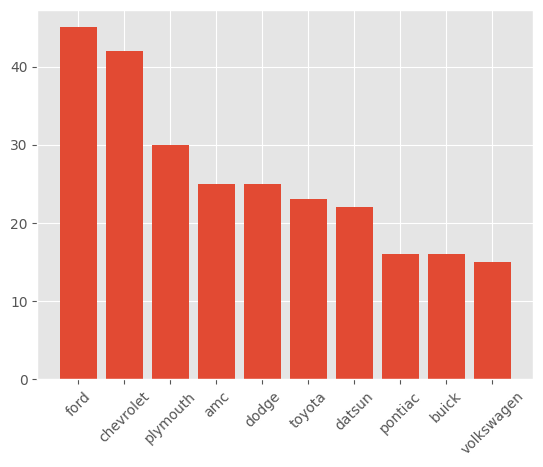

In [87]:
# Frequency --> bar chart

plt.bar([item[0] for item in temp_list],[item[1] for item in temp_list])
plt.tick_params(axis = 'x',rotation = 45)

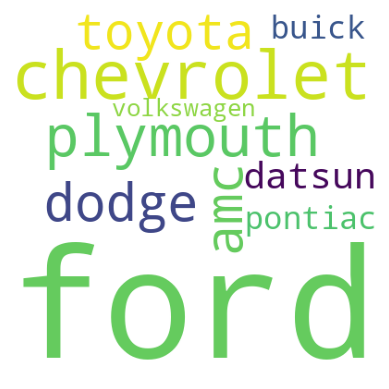

In [96]:
from wordcloud import WordCloud

wc = WordCloud(width=200, height=200, scale=2.0, max_font_size=150,background_color='white')
wc.generate_from_frequencies(dict(zip([item[0] for item in temp_list],[item[1] for item in temp_list])))

plt.xticks([])
plt.yticks([])
plt.imshow(wc)

In [ ]:
[item[0] for item in df.index.str.split(' ')]

In [98]:
df['firm']=[item[0] for item in df.index.str.split(' ')]

In [99]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,firm
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70,1,chevrolet
ford torino,17.0,8.0,302.0,140.0,3449.0,10.5,70,1,ford
chevrolet impala,14.0,8.0,454.0,220.0,4354.0,9.0,70,1,chevrolet
plymouth fury iii,14.0,8.0,440.0,215.0,4312.0,8.5,70,1,plymouth
pontiac catalina,14.0,8.0,455.0,225.0,4425.0,10.0,70,1,pontiac


In [102]:
df[df['firm']=='ford']['acceleration']

name
ford torino                 10.5
ford maverick               16.0
ford f250                   14.0
ford torino 500             15.5
ford galaxie 500            13.5
ford country squire (sw)    12.0
ford mustang                14.5
ford pinto runabout         16.5
ford galaxie 500            13.0
ford gran torino (sw)       16.0
ford pinto (sw)             16.0
ford gran torino            14.5
ford ltd                    13.0
ford maverick               16.5
ford country                12.5
ford pinto                  18.5
ford pinto                  16.5
ford gran torino            14.0
ford gran torino (sw)       16.0
ford maverick               19.5
ford ltd                    13.5
ford mustang ii             12.0
ford pinto                  17.0
ford pinto                  14.5
ford gran torino            12.8
ford maverick               17.6
ford granada ghia           21.0
ford pinto                  13.6
ford f108                   15.0
ford granada                19.0
ford 

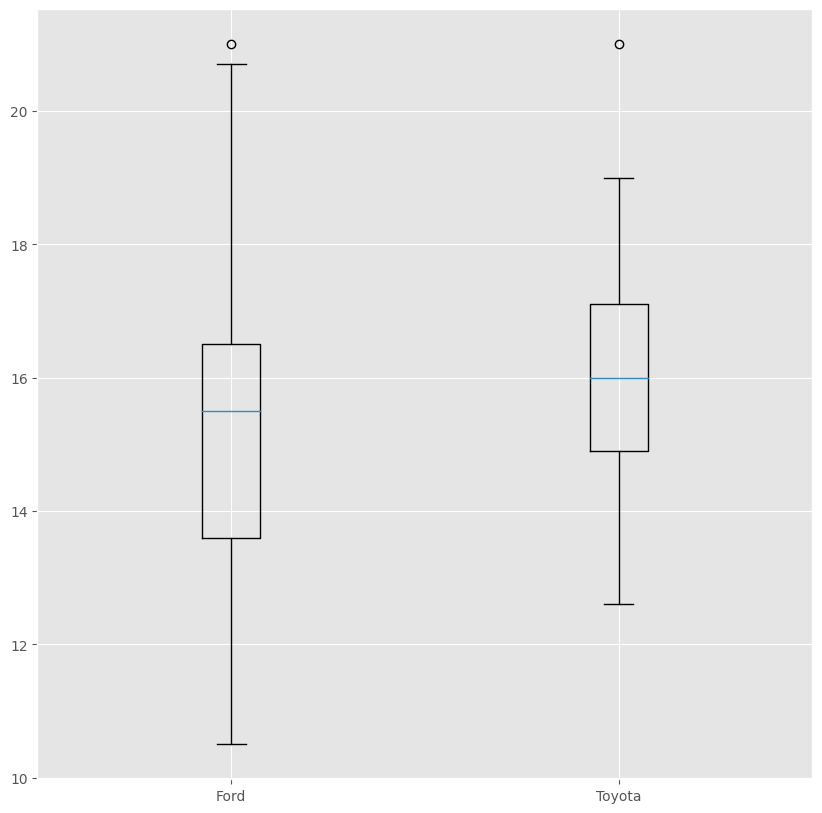

In [107]:
# 두 집단이 있으면, 이 집단의 차이를 보여준다 --> box plot, violin plot, swarm plot

def box_figure(x1,x2):
  fig = plt.figure(figsize=(10,10))
  ax = plt.subplot(111)
  ax.boxplot([x1,x2])
  ax.set_xticklabels(['Ford','Toyota'])

box_figure(df[df['firm']=='ford']['acceleration'],df[df['firm']=='toyota']['acceleration'])

In [120]:
def pi_figure(temp_dict):
  fig = plt.figure(figsize=(10,10))
  ax = plt.subplot(111)
  w = {"edgecolor": "black", "linewidth":1, "width":1}
  ax.pie(list(temp_dict.values()),autopct='%.2f%%',pctdistance=0.8,wedgeprops=w,textprops={'fontsize': 25,'fontweight':'bold'},labels=temp_dict.keys())
  #ax.legend()
df[df['firm'].isin(['ford','toyota','chevrolet'])]


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,firm
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70,1,chevrolet
ford torino,17.0,8.0,302.0,140.0,3449.0,10.5,70,1,ford
chevrolet impala,14.0,8.0,454.0,220.0,4354.0,9.0,70,1,chevrolet
chevrolet monte carlo,15.0,8.0,400.0,150.0,3761.0,9.5,70,1,chevrolet
toyota corona mark ii,24.0,4.0,113.0,95.0,2372.0,15.0,70,3,toyota
...,...,...,...,...,...,...,...,...,...
chevrolet cavalier 2-door,34.0,4.0,112.0,88.0,2395.0,18.0,82,1,chevrolet
ford fairmont futura,24.0,4.0,140.0,92.0,2865.0,16.4,82,1,ford
toyota corolla,34.0,4.0,108.0,70.0,2245.0,16.9,82,3,toyota


In [109]:
dict(Counter(df[df['firm'].isin(['ford','toyota','chevrolet'])]['firm']))

{'chevrolet': 42, 'ford': 45, 'toyota': 23}

In [117]:
dict(Counter(df[df['firm'].isin(['ford','toyota','chevrolet'])]['firm']))

{'chevrolet': 42, 'ford': 45, 'toyota': 23}

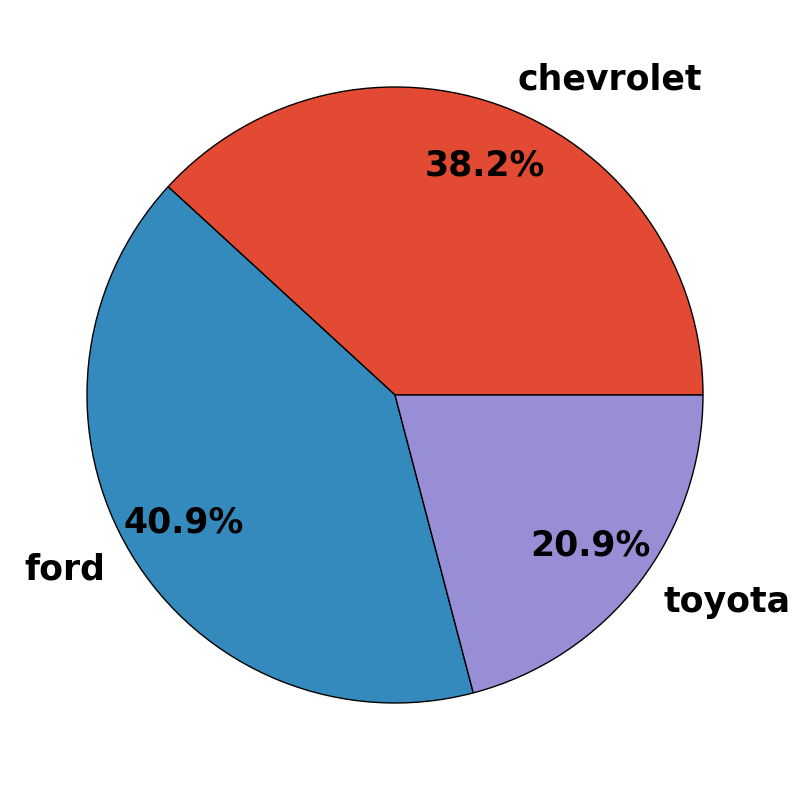

In [122]:
pi_figure(dict(Counter(df[df['firm'].isin(['ford','toyota','chevrolet'])]['firm'])))

## Patterns in Data

In [125]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,firm
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70,1,chevrolet
ford torino,17.0,8.0,302.0,140.0,3449.0,10.5,70,1,ford
chevrolet impala,14.0,8.0,454.0,220.0,4354.0,9.0,70,1,chevrolet
plymouth fury iii,14.0,8.0,440.0,215.0,4312.0,8.5,70,1,plymouth
pontiac catalina,14.0,8.0,455.0,225.0,4425.0,10.0,70,1,pontiac


In [123]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776761,-0.806987,-0.776725,-0.830077,0.424593,0.580872,0.555427
cylinders,-0.776761,1.000000,0.949783,0.843563,0.898321,-0.504532,-0.338125,-0.560118
displacement,-0.806987,0.949783,1.000000,0.901567,0.936704,-0.539820,-0.364685,-0.608454
horsepower,-0.776725,0.843563,0.901567,1.000000,0.868884,-0.691060,-0.384989,-0.451996
weight,-0.830077,0.898321,0.936704,0.868884,1.000000,-0.422788,-0.304416,-0.577258
acceleration,0.424593,-0.504532,-0.539820,-0.691060,-0.422788,1.000000,0.268772,0.214964
year,0.580872,-0.338125,-0.364685,-0.384989,-0.304416,0.268772,1.000000,0.177791
origin,0.555427,-0.560118,-0.608454,-0.451996,-0.577258,0.214964,0.177791,1.000000


In [127]:
df[df.columns[:-1]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70,1
ford torino,17.0,8.0,302.0,140.0,3449.0,10.5,70,1
chevrolet impala,14.0,8.0,454.0,220.0,4354.0,9.0,70,1
plymouth fury iii,14.0,8.0,440.0,215.0,4312.0,8.5,70,1
pontiac catalina,14.0,8.0,455.0,225.0,4425.0,10.0,70,1
...,...,...,...,...,...,...,...,...
chevrolet camaro,27.0,4.0,151.0,90.0,2950.0,17.3,82,1
vw pickup,44.0,4.0,97.0,52.0,2130.0,24.6,82,2
dodge rampage,32.0,4.0,135.0,84.0,2295.0,11.6,82,1


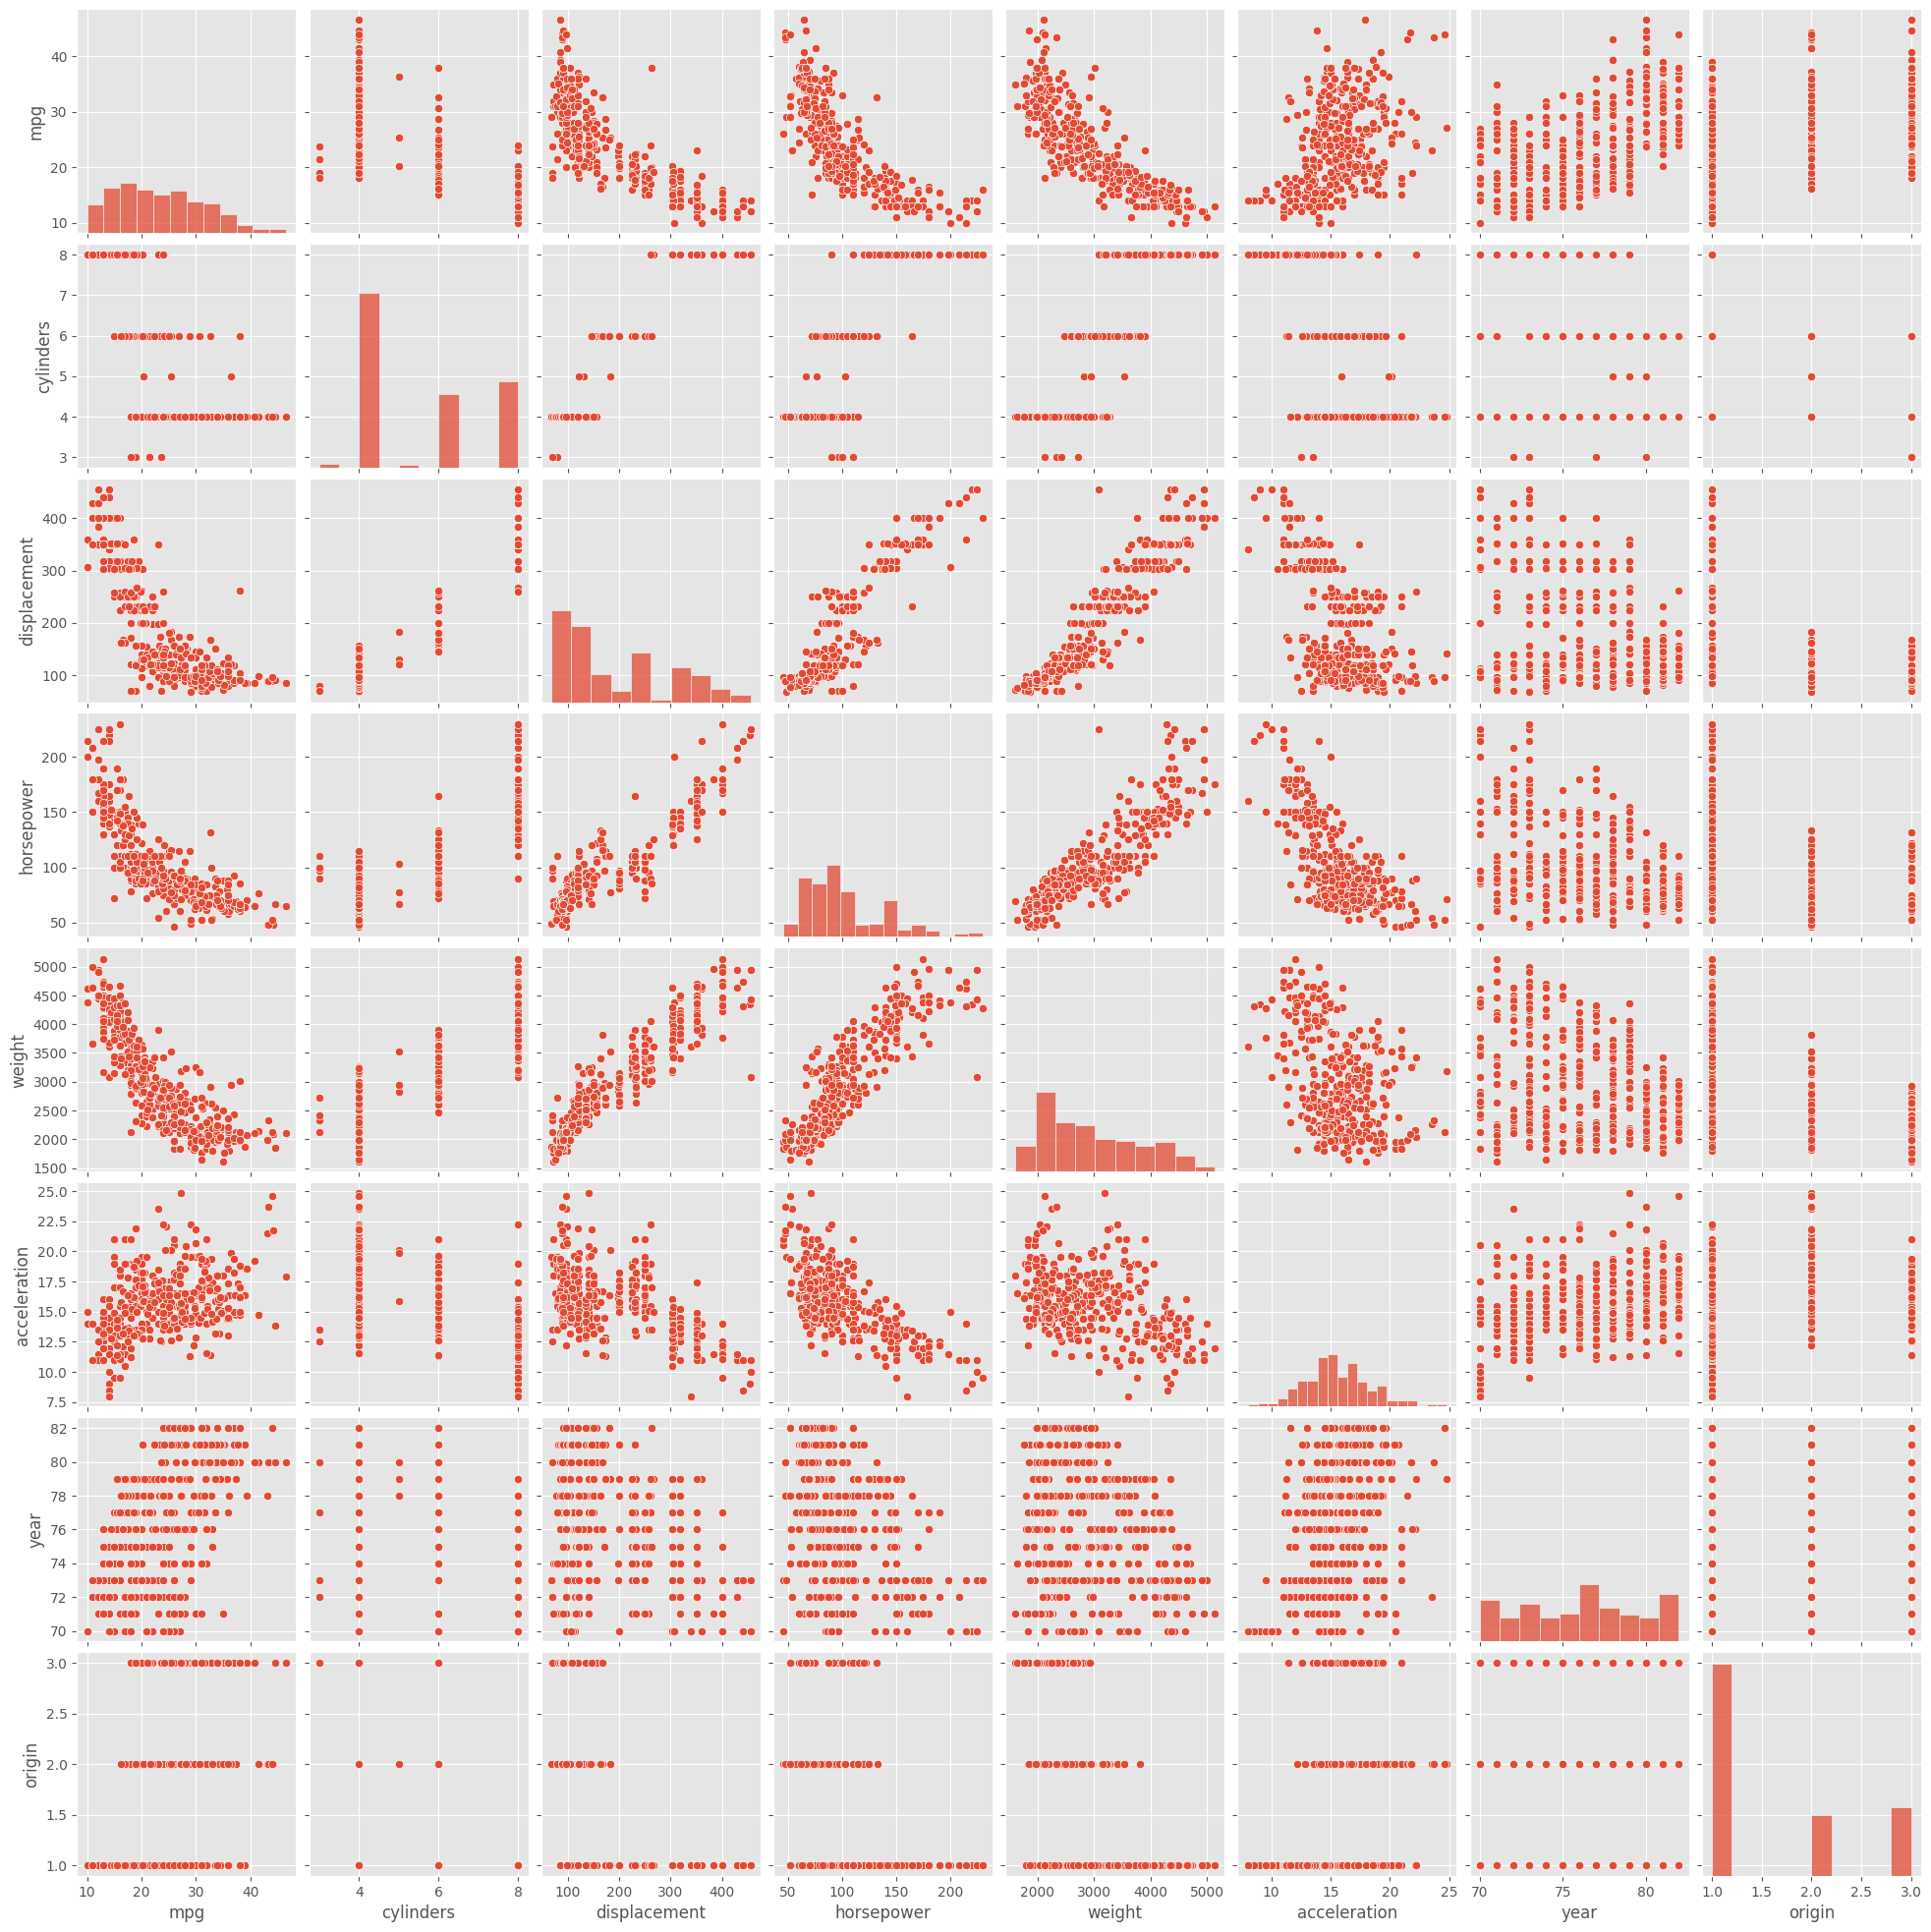

In [124]:
sns.pairplot(df[df.columns[:-1]])

In [128]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,firm
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70,1,chevrolet
ford torino,17.0,8.0,302.0,140.0,3449.0,10.5,70,1,ford
chevrolet impala,14.0,8.0,454.0,220.0,4354.0,9.0,70,1,chevrolet
plymouth fury iii,14.0,8.0,440.0,215.0,4312.0,8.5,70,1,plymouth
pontiac catalina,14.0,8.0,455.0,225.0,4425.0,10.0,70,1,pontiac
...,...,...,...,...,...,...,...,...,...
chevrolet camaro,27.0,4.0,151.0,90.0,2950.0,17.3,82,1,chevrolet
vw pickup,44.0,4.0,97.0,52.0,2130.0,24.6,82,2,vw
dodge rampage,32.0,4.0,135.0,84.0,2295.0,11.6,82,1,dodge


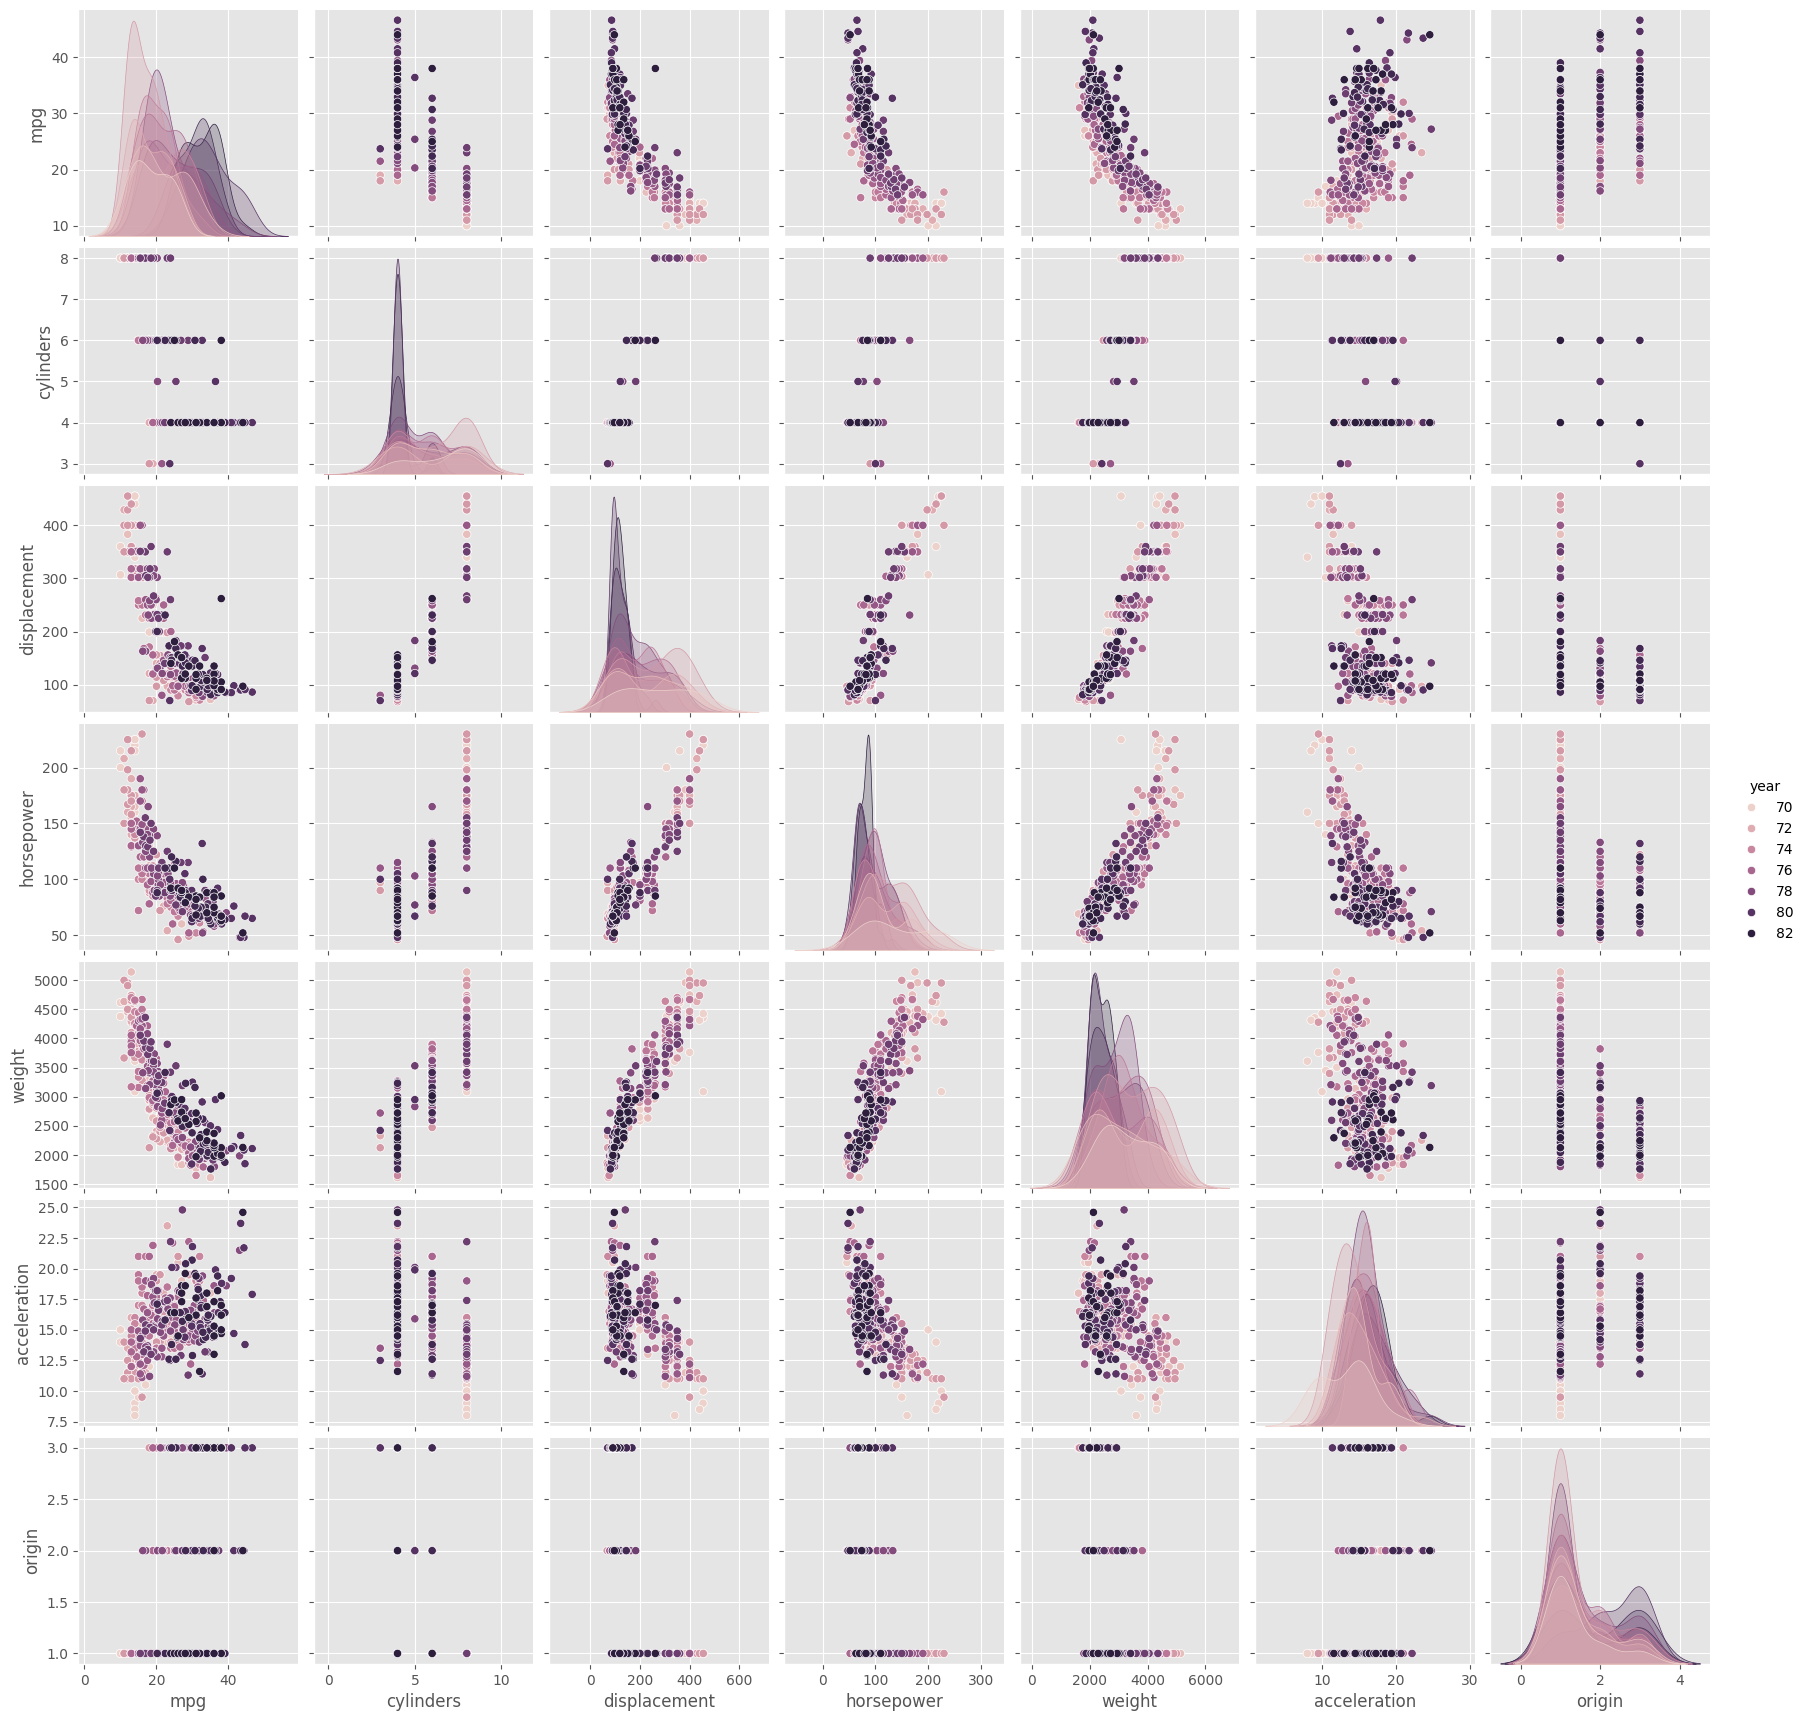

In [129]:
sns.pairplot(df[df.columns],hue='year')

# Linear Regression

## Data Import

In [130]:
df = pd.read_csv(r'/content/drive/MyDrive/Data/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [132]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [134]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


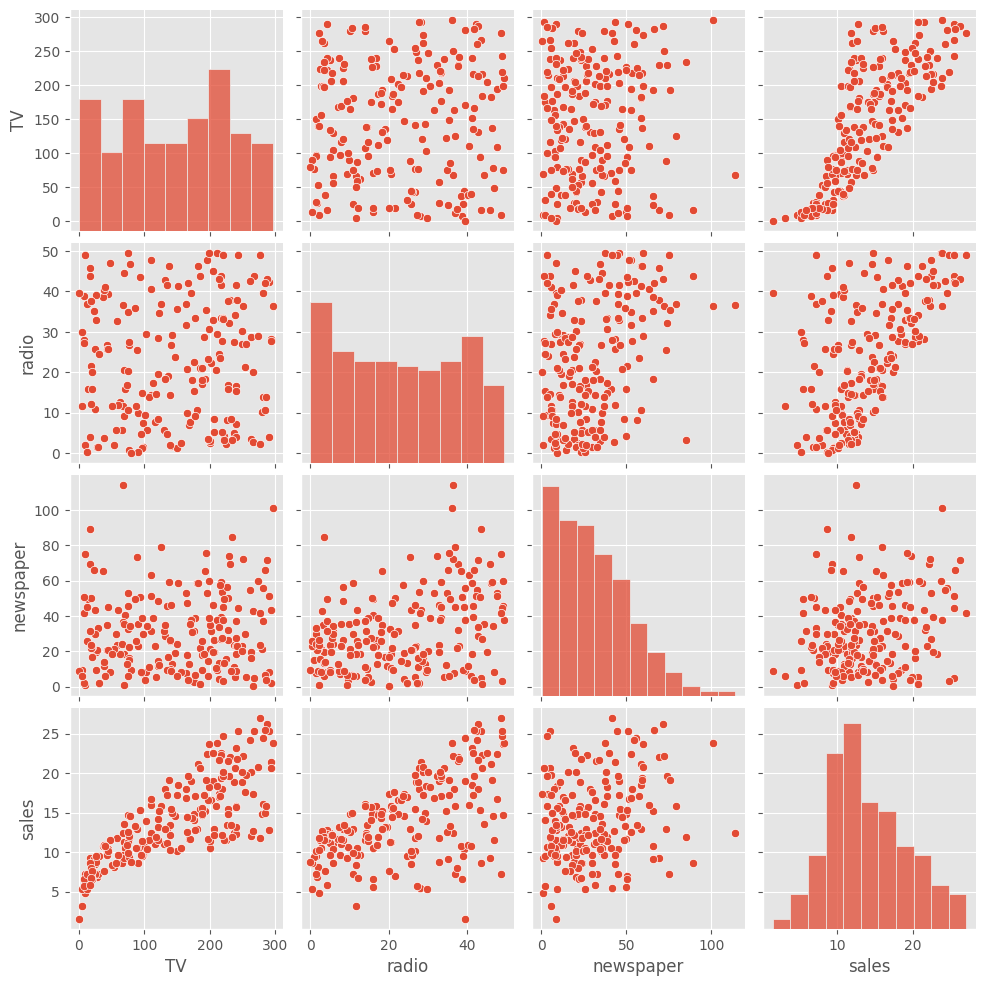

In [133]:
sns.pairplot(df[df.columns[1:]])

## Simple Regression Model

In [135]:
# Assumption Y ~ N (0,constant variance)
Y = np.array(df[['sales']])
Y.shape

(200, 1)

In [136]:
X = np.array(df[['TV']])
X.shape

(200, 1)

In [ ]:
# Sales ~ TV

In [137]:
# sm 라이브러리 활용
features = ['TV']
model = sm.OLS(Y,df[features])
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              1733.
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                   3.52e-100
Time:                        12:09:46   Log-Likelihood:                         -597.51
No. Observations:                 200   AIC:                                      1197.
Df Residuals:                     199   BIC:                                      1200.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0832      0.002     41.633      0.000       0.079       0.087
==============================================================================
Omnibus:                       20.228   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.930
Skew:                          -0.846   Prob(JB):                     6.36e-06
Kurtosis:                       3.086   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
# Numpy로 만들기
_ = np.dot(np.transpose(X),X)
_ = np.linalg.inv(_)
_ = np.dot(_,np.transpose(X))
coeff = np.dot(_,Y)
coeff

array([[0.08324961]])

In [139]:
Y_hat = coeff*X
Y_bar = 0
residuals = Y-Y_hat

In [140]:
TSS = np.sum((Y-Y_bar)**2)
SSreg = np.sum((Y_hat-Y_bar)**2)
RSS = np.sum((Y-Y_hat)**2)
n = Y.shape[0]
p = X.shape[1]
print("TSS = ", TSS)
print("SSreg = ", SSreg)
print("RSS = ", RSS)
print("SSreg + RSS = ", SSreg + RSS)
print("R squared = ", 1-RSS/TSS)
print("Adjusted R squared = ", 1-(RSS/(n-p-1))/(TSS/(n-1)))

TSS =  44743.25
SSreg =  40135.330664092246
RSS =  4607.91933590774
SSreg + RSS =  44743.249999999985
R squared =  0.8970142013396939
Adjusted R squared =  0.8964940710434297


In [141]:
print("TSS = ", result.uncentered_tss)
print("SSreg = ", result.mse_model)
print("RSS = ", result.ssr)
print("SSreg + RSS = ", result.mse_model + result.ssr)
print("R squared = ", result.rsquared)
print("Adjusted R squared = ", result.rsquared_adj)

TSS =  44743.25
SSreg =  40135.33066409226
RSS =  4607.919335907738
SSreg + RSS =  44743.25
R squared =  0.897014201339694
Adjusted R squared =  0.8964966847635116


## Multiple Regression Model

In [144]:
# Assumption Y ~ N (0,constant variance)
Y = np.array(df[['sales']])
Y.shape

(200, 1)

In [145]:
features = ['TV','radio','newspaper']
X = np.array(df[features])
X.shape

(200, 3)

In [146]:
# Numpy로 만들기
_ = np.dot(np.transpose(X),X)
_ = np.linalg.inv(_)
_ = np.dot(_,np.transpose(X))
coeff = np.dot(_,Y)
coeff

array([[0.05379188],
       [0.22222731],
       [0.01681639]])

In [147]:
Y_hat = np.dot(X,coeff)
Y_bar = 0
residuals = Y-Y_hat

In [148]:
# sm 라이브러리 활용
model = sm.OLS(Y,df[features])
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                   2.43e-171
Time:                        12:15:57   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## With Constant

In [149]:
df['constant']=[1 for i in range(len(df))]

features = ['TV','radio','newspaper']
X = np.array(df[['constant']+features])
X.shape

(200, 4)

In [150]:
# Numpy로 만들기
_ = np.dot(np.transpose(X),X)
_ = np.linalg.inv(_)
_ = np.dot(_,np.transpose(X))
coeff = np.dot(_,Y)
coeff

array([[ 2.93888937e+00],
       [ 4.57646455e-02],
       [ 1.88530017e-01],
       [-1.03749304e-03]])

In [157]:
X

array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 151.5,  41.3,  58.5],
       [  1. , 180.8,  10.8,  58.4],
       [  1. ,   8.7,  48.9,  75. ],
       [  1. ,  57.5,  32.8,  23.5],
       [  1. , 120.2,  19.6,  11.6],
       [  1. ,   8.6,   2.1,   1. ],
       [  1. , 199.8,   2.6,  21.2],
       [  1. ,  66.1,   5.8,  24.2],
       [  1. , 214.7,  24. ,   4. ],
       [  1. ,  23.8,  35.1,  65.9],
       [  1. ,  97.5,   7.6,   7.2],
       [  1. , 204.1,  32.9,  46. ],
       [  1. , 195.4,  47.7,  52.9],
       [  1. ,  67.8,  36.6, 114. ],
       [  1. , 281.4,  39.6,  55.8],
       [  1. ,  69.2,  20.5,  18.3],
       [  1. , 147.3,  23.9,  19.1],
       [  1. , 218.4,  27.7,  53.4],
       [  1. , 237.4,   5.1,  23.5],
       [  1. ,  13.2,  15.9,  49.6],
       [  1. , 228.3,  16.9,  26.2],
       [  1. ,  62.3,  12.6,  18.3],
       [  1. , 262.9,   3.5,  19.5],
       [  1. , 142.9,  29.3,  12.6],
 

In [160]:
# sm 라이브러리 활용
X = np.array(df[features])
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.58e-96
Time:                        12:20:37   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
x1             0.0458      0.001     32.809      0.000       0.043       0.049
x2             0.1885      0.009     21.893      0.000       0.172       0.206
x3            -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df

In [164]:
# sm 라이브러리 활용
model = sm.OLS.from_formula('sales ~ 1 + TV + radio + newspaper',data=df)
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.58e-96
Time:                        12:22:12   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Inference

In [168]:
features

['TV', 'radio', 'newspaper']

In [185]:
Full_model = sm.OLS(Y,df[features])
Reduced_model = sm.OLS(Y,df['TV'])

Full_model_result=Full_model.fit()
Reduced_model_result=Reduced_model.fit()

In [186]:
sm.stats.anova_lm(Full_model_result,Reduced_model_result)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,197.0,809.043014,0.0,NaN,NaN,NaN
1,199.0,4607.919336,-2.0,-3798.876322,82.030124,NaN


In [187]:
Full_model = sm.OLS.from_formula('sales ~ TV + radio + newspaper',data=df)
Full_model_result=Full_model.fit()

In [188]:
Full_model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.58e-96
Time:                        12:30:57   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
sm.stats.anova_lm(Full_model_result,typ=2)

,sum_sq,df,F,PR(>F)
TV,3058.010016,1.0,1076.405837,1.509960e-81
radio,1361.736549,1.0,479.325170,1.505339e-54
newspaper,0.088717,1.0,0.031228,8.599151e-01
Residual,556.825263,196.0,NaN,NaN


In [190]:
Full_model = sm.OLS.from_formula('sales ~ radio + TV + newspaper',data=df)
Full_model_result=Full_model.fit()
sm.stats.anova_lm(Full_model_result,typ=2).sort_values(by=['F'],ascending=False)

,sum_sq,df,F,PR(>F)
TV,3058.010016,1.0,1076.405837,1.509960e-81
radio,1361.736549,1.0,479.325170,1.505339e-54
newspaper,0.088717,1.0,0.031228,8.599151e-01
Residual,556.825263,196.0,NaN,NaN


In [191]:
temp_df = sm.stats.anova_lm(Full_model_result,typ=2).sort_values(by=['F'],ascending=False)
temp_df['t']=np.power(temp_df['F'],0.5)
temp_df

,sum_sq,df,F,PR(>F),t
TV,3058.010016,1.0,1076.405837,1.509960e-81,32.808624
radio,1361.736549,1.0,479.325170,1.505339e-54,21.893496
newspaper,0.088717,1.0,0.031228,8.599151e-01,0.176715
Residual,556.825263,196.0,NaN,NaN,NaN


## Diagnostic

### Error assumption & Outlier

In [192]:
max(Full_model_result.fittedvalues)

24.78687031418368

In [193]:
np.std(Full_model_result._results.resid)*3

5.005710422167709

In [194]:
Q1 = np.quantile(Full_model_result._results.resid,0.25)
Q3 = np.quantile(Full_model_result._results.resid,0.75)
IQR = Q3 - Q1
Q1 - 1.5*IQR
Q3 - 1.5*IQR

-1.9308796311361873

In [196]:
Full_model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.58e-96
Time:                        12:33:17   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
radio          0.1885      0.009     21.893      0.000       0.172       0.206
TV             0.0458      0.001     32.809      0.000       0.043       0.049
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

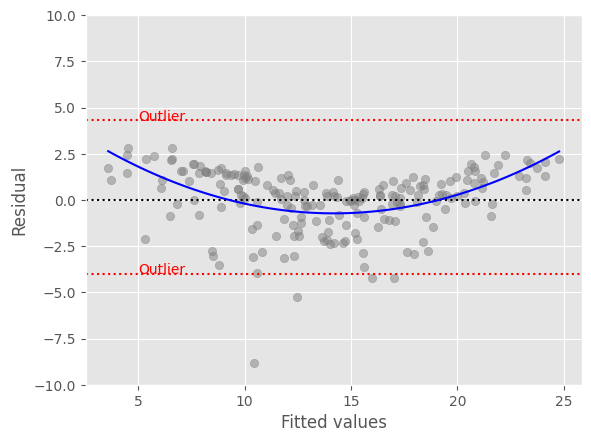

In [200]:
# Check equal variance
plt.scatter(Full_model_result._results.fittedvalues,Full_model_result._results.resid,color='grey',alpha=0.5)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.axhline(y=0,color='black',linestyle = 'dotted')
plt.ylim(-10,10)

plt.axhline(y=(Q1 - 1.5*IQR),color='red',linestyle='dotted')
plt.axhline(y=(Q3 + 1.5*IQR),color='red',linestyle='dotted')
plt.text(5,(Q1 - 1.5*IQR),'Outlier',color='red')
plt.text(5,(Q3 + 1.5*IQR),'Outlier',color='red')

# Curved fitting
coeff=np.polyfit(Full_model_result.fittedvalues,Full_model_result._results.resid,2)
b0=coeff[0]
b1=coeff[1]
b2=coeff[2]
Vtrend=np.linspace(min(Full_model_result.fittedvalues),max(Full_model_result.fittedvalues),100)
Ttrend=b0* Vtrend* Vtrend+b1* Vtrend+b2
plt.plot(Vtrend,Ttrend,'blue')

((array([-2.70069508, -2.39117927, -2.21476595, -2.08844273, -1.98865134,
         -1.90545091, -1.83366817, -1.77025272, -1.7132485 , -1.66132288,
         -1.61352545, -1.56915347, -1.52767212, -1.48866446, -1.45179889,
         -1.41680716, -1.38346902, -1.35160134, -1.32105008, -1.29168444,
         -1.26339229, -1.23607681, -1.20965371, -1.18404921, -1.1591983 ,
         -1.13504337, -1.11153314, -1.08862177, -1.06626803, -1.04443478,
         -1.02308837, -1.00219826, -0.9817366 , -0.96167793, -0.94199891,
         -0.9226781 , -0.90369573, -0.88503353, -0.86667459, -0.84860322,
         -0.83080482, -0.8132658 , -0.79597346, -0.77891592, -0.76208206,
         -0.74546144, -0.72904425, -0.71282124, -0.69678371, -0.68092342,
         -0.6652326 , -0.64970389, -0.63433029, -0.61910517, -0.60402223,
         -0.58907547, -0.57425918, -0.55956789, -0.5449964 , -0.53053972,
         -0.51619308, -0.50195192, -0.48781183, -0.47376862, -0.45981823,
         -0.44595676, -0.43218046, -0.

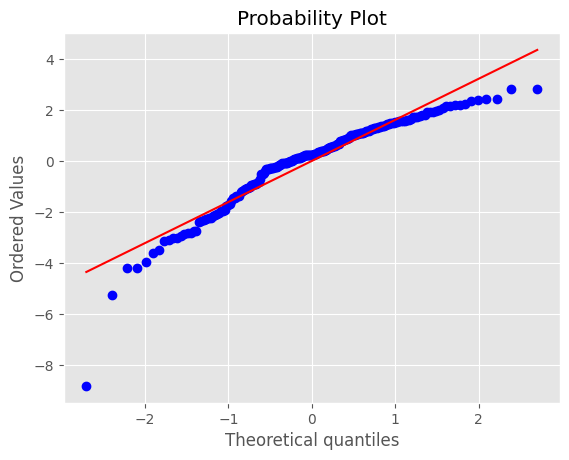

In [201]:
# Check Normality
import scipy.stats as stats
plt.figure()
stats.probplot(Full_model_result._results.resid,dist = stats.norm,plot=plt)

### Systematic component assumptions

Text(0.5, 1.0, 'newspaper')

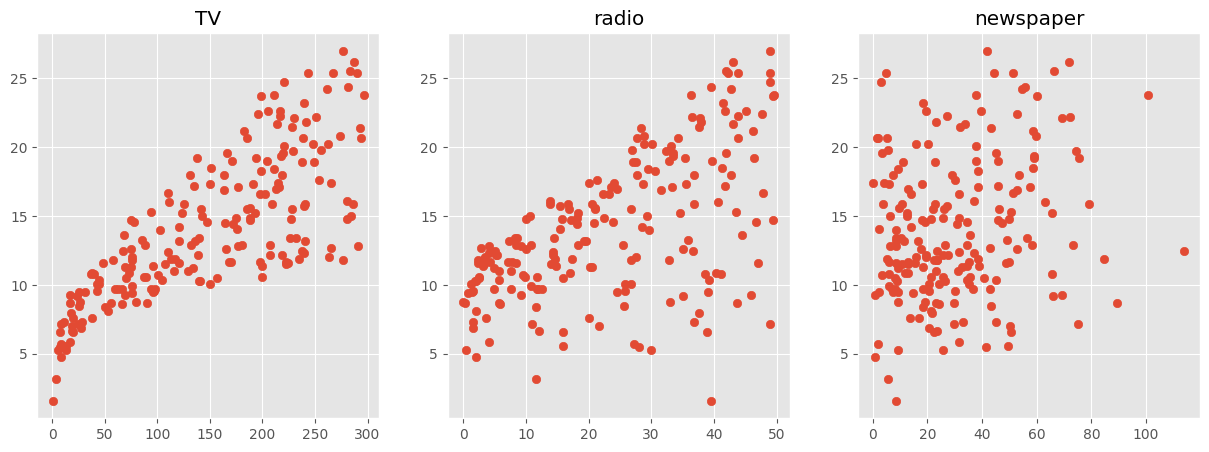

In [202]:
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(131)
ax.scatter(df['TV'],df['sales'])
ax.set_title("TV")

ax = plt.subplot(132)
ax.scatter(df['radio'],df['sales'])
ax.set_title("radio")

ax = plt.subplot(133)
ax.scatter(df['newspaper'],df['sales'])
ax.set_title("newspaper")

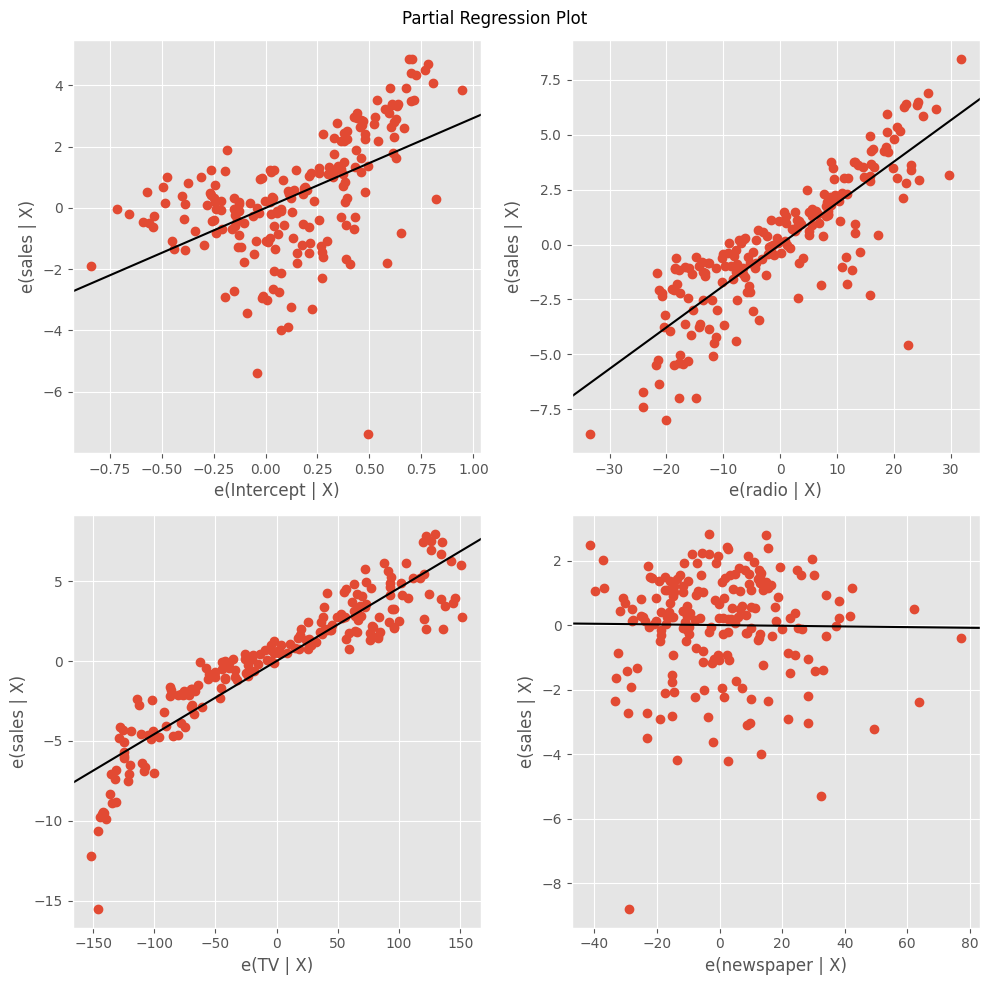

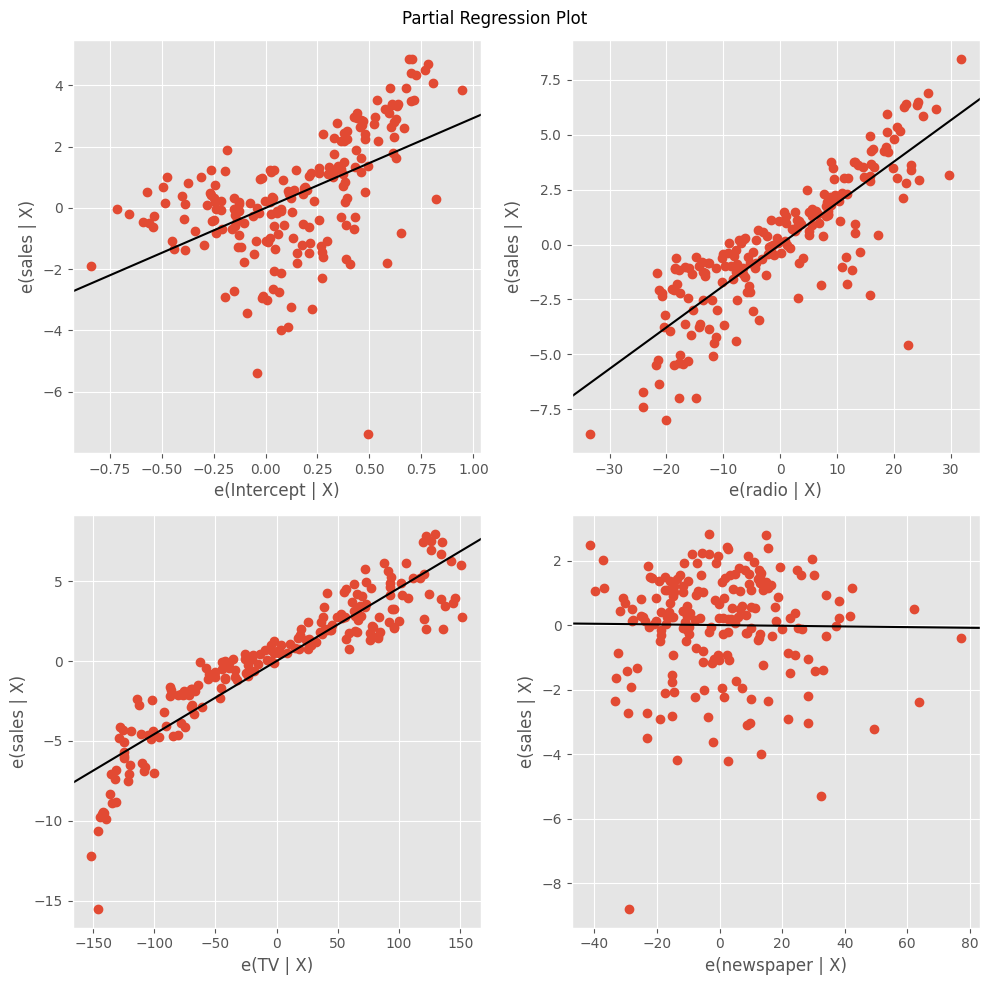

In [203]:
# Linearity
fig = plt.figure(figsize=(10,10))
sm.graphics.plot_partregress_grid(Full_model_result,fig = fig)

## Model Selection & Prediction

In [205]:
import math
df['sales_log']=df['sales'].apply(math.log)

In [206]:
model = sm.OLS.from_formula('sales_log ~ 1+ TV + radio',data=df)
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sales_log   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     392.7
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.85e-69
Time:                        12:42:36   Log-Likelihood:                 53.597
No. Observations:                 200   AIC:                            -101.2
Df Residuals:                     197   BIC:                            -91.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7451      0.033     53.425      0.000       1.681       1.809
TV             0.0037      0.000     23.818      0.000       0.003       0.004
radio          0.0120      0.001     13.439      0.000       0.010       0.014
==============================================================================
Omnibus:                      241.255   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13639.634
Skew:                          -4.842   Prob(JB):                         0.00
Kurtosis:                      42.281   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
Q1 = np.quantile(result._results.resid,0.25)
Q3 = np.quantile(result._results.resid,0.75)
IQR = Q3 - Q1
Q1 - 1.5*IQR
Q3 - 1.5*IQR

-0.13718703168131088

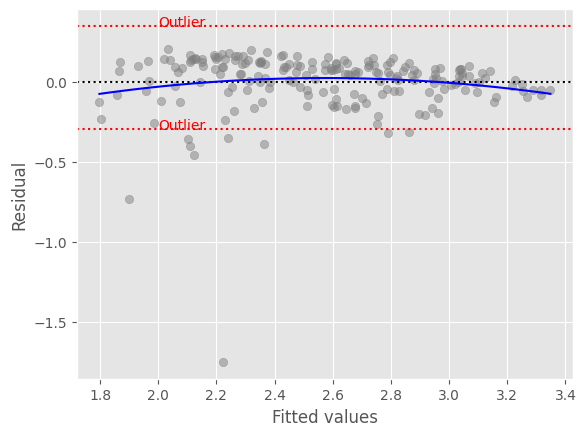

In [208]:
# Check equal variance
plt.scatter(result._results.fittedvalues,result._results.resid,color='grey',alpha=0.5)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.axhline(y=0,color='black',linestyle = 'dotted')

plt.axhline(y=(Q1 - 1.5*IQR),color='red',linestyle='dotted')
plt.axhline(y=(Q3 + 1.5*IQR),color='red',linestyle='dotted')
plt.text(2,(Q1 - 1.5*IQR),'Outlier',color='red')
plt.text(2,(Q3 + 1.5*IQR),'Outlier',color='red')

# Curved fitting
coeff=np.polyfit(result.fittedvalues,result._results.resid,2)
b0=coeff[0]
b1=coeff[1]
b2=coeff[2]
Vtrend=np.linspace(min(result.fittedvalues),max(result.fittedvalues),100)
Ttrend=b0* Vtrend* Vtrend+b1* Vtrend+b2
plt.plot(Vtrend,Ttrend,'blue')

In [209]:
# Remove outlier

np.where(result._results.resid>=(Q3 + 1.5*IQR))
np.where(result._results.resid<=(Q1 - 1.5*IQR))

(array([  5,  35,  56,  78, 126, 130, 132, 155, 178]),)

In [210]:
df_adj = df.drop([  5,  35,  56,  78, 126, 130, 132, 155, 178],axis = 0)
df_adj.reset_index(inplace=True,drop=True)
len(df_adj)

191

In [211]:
Y = np.array(df_adj[['sales_log']])
X = np.array(df_adj[['constant','TV','radio']])

In [212]:
model = sm.OLS(Y,X)
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1163.
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          1.42e-106
Time:                        12:43:22   Log-Likelihood:                 172.75
No. Observations:                 191   AIC:                            -339.5
Df Residuals:                     188   BIC:                            -329.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8178      0.018    102.131      0.000       1.783       1.853
x1             0.0032   8.76e-05     36.616      0.000       0.003       0.003
x2             0.0130      0.000     26.707      0.000       0.012       0.014
==============================================================================
Omnibus:                       38.822   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.867
Skew:                          -1.163   Prob(JB):                     4.48e-13
Kurtosis:                       4.319   Cond. No.                         431.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [213]:
y_true = list(df_adj['sales_log'])
y_pred = result.predict(X)

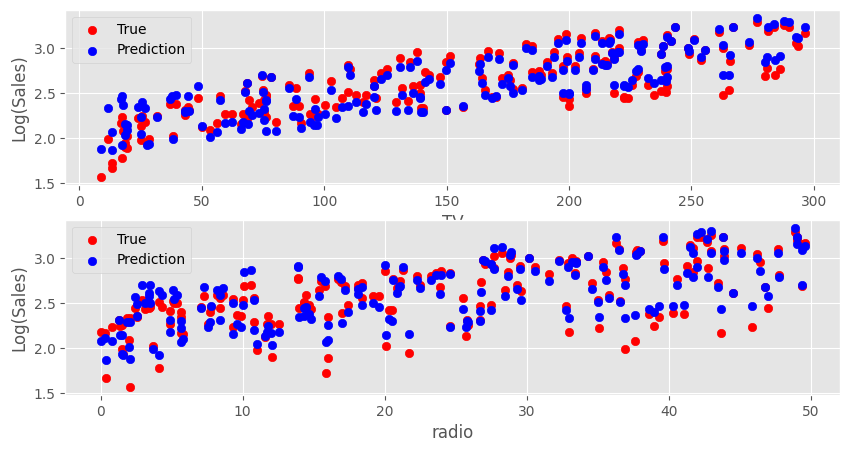

In [214]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(211)
ax.scatter(X[:,1],y_true,color='red',label='True')
ax.scatter(X[:,1],y_pred,color='blue',label="Prediction")
ax.set_xlabel('TV')
ax.set_ylabel('Log(Sales)')

ax.legend()

ax = plt.subplot(212)
ax.scatter(X[:,2],y_true,color='red',label='True')
ax.scatter(X[:,2],y_pred,color='blue',label="Prediction")
ax.set_xlabel('radio')
ax.set_ylabel('Log(Sales)')
ax.legend()

In [215]:
df_adj.head()

,Unnamed: 0,TV,radio,newspaper,sales,constant,sales_log
0,1,230.1,37.8,69.2,22.1,1,3.095578
1,2,44.5,39.3,45.1,10.4,1,2.341806
2,3,17.2,45.9,69.3,9.3,1,2.230014
3,4,151.5,41.3,58.5,18.5,1,2.917771
4,5,180.8,10.8,58.4,12.9,1,2.557227


In [218]:
result.predict([1,0.1,37.8])

array([2.31000213])